In [ ]:
#keras คล้าย python 

In [25]:
from keras.datasets import mnist

In [26]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
y_train.shape

(60000,)

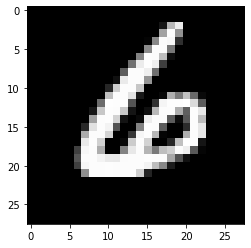

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2345],cmap=plt.get_cmap('gray'))
plt.show()

In [37]:
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')

In [38]:
X_train=X_train.reshape(X_train.shape[0],1,28,28)
X_test=X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
#Z-scroing (Standardisation)

In [39]:
import numpy as np

In [40]:
np.mean(X_train)

33.318421449829934

In [41]:
np.std(X_train)#ใช้แบบไหนก็ได้

78.56748998339798

In [42]:
X_train.std() #ใช้แบบไหนก็ได้

78.56748998339798

In [43]:
Z_train=(X_train-np.mean(X_train))/X_train.std() #Z= X-mean/variane
Z_test=(X_test - np.mean(X_test))/X_test.std()

In [44]:
Z_train.mean()

-3.064638490070051e-17

In [45]:
Z_train.std()

0.9999999999999998

In [46]:
Z_train.shape #เพิ่ม channal 1 ขึ้นมา

(60000, 1, 28, 28)

In [47]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,num_classes=1)
y_test=np_utils.to_categorical(y_test,num_classes=1) #แปลง str - num คือการทำ catigolical

In [48]:
y_test.shape # 2 หายยยย

(10000, 10)

In [49]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [52]:
num_classes=y_test.shape[1]

In [56]:
num_classes

10

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [53]:
#create a model
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(1,28,28),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) #ทิ้ง pooling ไป 30 % ลดเวลาในการ conv 
model.add(Flatten()) #แปลง array 2D to vector 1D
model.add(Dense(240,activation='elu')) #fully connected
model.add(Dense(num_classes,activation='softmax')) #หลายเอาท์พุตให้ใช้ softmax 
print(model.output_shape)

(None, 10)


In [54]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [57]:
model.fit(Z_train,y_train,validation_data=(Z_test,y_test),epochs=1,batch_size=200)

InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential_2/max_pooling2d_1/MaxPool (defined at \Temp/ipykernel_8672/2729632807.py:1) ]] [Op:__inference_train_function_812]

Function call stack:
train_function


In [ ]:
scores=model.evaluate(Z_test,y_test)
scores
print("CNN error: %.2f%%" %(100-score[1]*100))

In [ ]:
#เพิ่มจำนวน layer CNN 

In [ ]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(1,28,28),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),input_shape=(1,28,28),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) #ทิ้ง pooling ไป 30 % ลดเวลาในการ conv 
model.add(Flatten()) #แปลง array 2D to vector 1D
model.add(Dense(240,activation='elu')) #fully connected
model.add(Dense(num_classes,activation='softmax')) #หลายเอาท์พุตให้ใช้ softmax 
print(model.output_shape)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(Z_train,y_train,validation_data=(Z_test,y_test),epochs=1,batch_size=200)

In [ ]:
scores2=model.evaluate(Z_test,y_test)
scores2
print("CNN error: %.2f%%" %(100-score[1]*100))

#error น้อยลง acc ต่ำกว่า แต่ val data 

In [ ]:
#Five powerful CNN Architectures